# **Grover's Search**
---
## **Team Members:**
Arife Nur Ayaz
repository link: https://github.com/arife-16/FLIQ-Education-track_quAY/tree/main
### **Introduction**
You are in a situation where you have a large unsorted database with N items, and among them, there's a single "marked" item -The "needle in a haystack"- that you want to find. Classically, in the worst case, you might have to look through all N items to find it, giving you a time complexity of O(N).

But rather than searching brutally, can we enhance the 'visibility' of this item in the quantum realm? This is mathematically possible through a technique called amplitude amplification, a key component of quantum algorithms. In this notebook, we will explore how we can achieve this using the principles of linear algebra applied to quantum states and operations, and how this mathematical framework allows us to make the 'marked' item significantly more likely to be found with a quantum algorithm.

Let the math do the work!!

### **Learning Goals**
* Understanding what is Grover's Algorithm and its usage case.
* Learning the mathematical consept and reasoning behind the algorithm.
* Constructing the algorithm block by block.
* Successfully run the algorithm on both a simulator and a real quantum hardware.
* Making further analysis and investigations around the parameters of the algorithm.

### **Amplitude amplification strategy**

#### **1. The N items**
we are given 8 distinct magical cards are laid face down in a row. We know one of these cards is special – it's the "marked" card we're looking for. Since they're face down, all we see is the identical back of each card. Since we can't look at the face of these cards, we are trying to find a strategy for pulling the correct one.

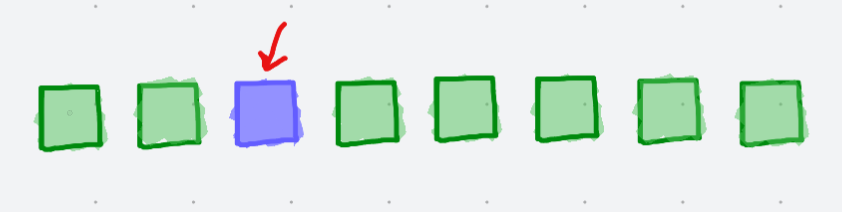

#### **2. Setting the stage**
Since they are magical cards, they can iteract with a special table called "qauntum table", which we will get help from to determine the card we are looking for. This quantum table puts each card in a position called "superposition" after knowing how many cards there are and give each card an identical number constructed of 3 digits of 0's and 1's. For now, the probability of picking one of them - The amplitude of each card - is equal.

The initial amplitude for each card being the special one is $\frac{1}{\sqrt{8}}$ which we can think of as its "potential" to be measured.

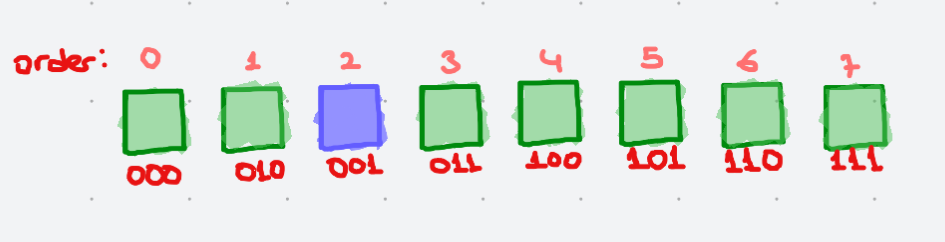

#### **3. The magical oracle**
Our quantum table has an oracle that can recognize the card without revealing its face. when we present all 8 cards (in their superposition) to the oracle, it subtly marks the special card. It simply flips in the sign of its amplitude. So, if the special card had an amplitude of  $+\frac{1}{\sqrt{8}}$, after the oracle, its amplitude becomes  $-\frac{1}{\sqrt{8}}$. The amplitude of the other 7 ordinary cards remain the same ($+\frac{1}{\sqrt{8}}$)

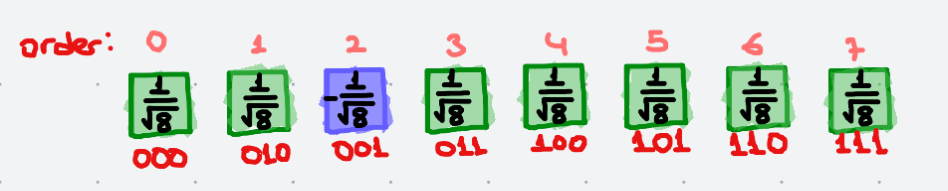

#### **4. Making the Hint Louder (The Diffusion Operator - Amplitude Amplification)**

If we were to randomly pick a card now (perform a measurement), the probability of picking the special card (which is the square of its amplitude, $(-\frac{1}{\sqrt{8}})^2 = \frac{1}{8}$) still the same as picking any other card.

This is where the amplitude amplification magic comes in. We perform a series of quantum operations that effectively take the small negative amplitude of the marked card and "amplify" it, while decreasing the amplitudes of the other cards.

## **Grover's Algorithm: The Mathematics Behind It**

### **0.1 The Quantum Playing Field: Superposition**


Now that we've defined our search problem (finding one marked card out of N), let's dive into how Grover's algorithm quantumly "highlights" this card. The algorithm iteratively applies two main quantum operators: the Oracle and the Diffuser.

But before we build these, we need to prepare our "quantum table" – our qubits.

**The Quantum Playing Field: Superposition**

our n qubits (3 in our 8-card example) represent the "address" or identification number of each card.

|000⟩ could be card 0

|001⟩ could be card 1

|010⟩ could be card 2 (our correct_choice)

...

|111⟩ could be card 7

Classically, we'd check one card at a time. Quantumly, we can check them all simultaneously! This is achieved by putting our data qubits into an **equal superposition**.

We start with all data qubits in the
∣0⟩ state (∣000⟩). Then, we apply a Hadamard (H) gate to each data qubit.

* A single qubit: $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

* For n qubits: $H^{\otimes n}|0\rangle^{\otimes n} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$

This creates a state where every possible card combination (from $|000\rangle$ to $|111\rangle$) has an equal amplitude of $\frac{1}{\sqrt{N}}$ (in our case $\frac{1}{\sqrt{8}}$).

Let's create a superposition of n qubits with Hadamard gate.

In [ ]:
nqubits = # COMPLETE THİS CODE
data_qr = QuantumRegister(# COMPLETE THİS CODE
qc = # COMPLETE THİS CODE
qc.h(range(nqubits))
print("Circuit for initial superposition:")
print(qc.draw(output='text'))

###### **Solution**

In [ ]:
nqubits = 3
data_qr = QuantumRegister(nqubits, name="data")
qc = QuantumCircuit(data_qr)
qc.h(range(nqubits)) # Apply H to all data qubits (0, 1, 2)
print("Circuit for initial superposition:")
print(qc.draw(output='text'))

Circuit for initial superposition:
        ┌───┐
data_0: ┤ H ├
        ├───┤
data_1: ┤ H ├
        ├───┤
data_2: ┤ H ├
        └───┘


### **0.2 The Oracle ($U_w$):  Marking the Special Card**




The first key component of Grover's algorithm is the Oracle. Its job is to "mark" the state we are searching for -which in our case is [0, 1, 0]. It does this by applying a phase flip of -1 to the amplitude of the marked state, while leaving all other states' amplitudes unchanged.

If $|w\rangle$ is our marked state and $|x\rangle$ is any other state:

* $U_w|w\rangle = -|w\rangle$
* $U_w|x\rangle = |x\rangle$

#### **Implementation using an Ancilla Qubit and Phase Kickback:**

To achieve this conditional phase flip, we introduce an **ancilla qubit**.

#### 1. **Initialize Ancilla**:


The ancilla qubit is prepared in the state $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. This is the superposition state obtained by applying an X gate (to flip it from $|0\rangle$ to $|1\rangle$) and then a Hadamard (H) gate.

This specific state is essential for the phase kickback to work.

In [ ]:
ancilla_qubit = QuantumRegister(# COMPLETE THİS CODE
#update the qc circuit so that it has the ancilla too
qc = QuantumCircuit(# COMPLETE THİS CODE
qc.# COMPLETE THİS CODE
qc.# COMPLETE THİS CODE
qc.# COMPLETE THİS CODE
print("Circuit with initialized ancilla qubit:")
print(qc.draw(output='text'))

###### **Solution**

In [ ]:
ancilla_qubit = QuantumRegister(1, name='ancilla')
qc = QuantumCircuit(data_qr, ancilla_qubit)
qc.x(ancilla_qubit)
qc.h(ancilla_qubit)
qc.h(range(nqubits))
print("Circuit with initialized ancilla qubit:")
print(qc.draw(output='text'))

Circuit with initialized ancilla qubit:
         ┌───┐     
 data_0: ┤ H ├─────
         ├───┤     
 data_1: ┤ H ├─────
         ├───┤     
 data_2: ┤ H ├─────
         ├───┤┌───┐
ancilla: ┤ X ├┤ H ├
         └───┘└───┘


#### 2. **Controlled Operation(MCX)**:


We then perform a multi-controlled-X (MCX) gate. The data qubits are the controls, and the ancilla qubit is the target.

The MCX gate (multi-controlled X) flips the state of its target qubit only if all of its control qubits are in the state $|1\rangle$.

* We want the MCX gate to flip the ancilla qubit (and thus apply the phase kickback) when the data qubits are in a specific state, which we define as our `marked_bitstring` .

* However, our marked_bitstring might contain zeros. For example, if our marked state is $|010\rangle$, the first and third qubits are $|0\rangle$.

* If we directly apply the MCX with data qubits in the state $|010\rangle$, the MCX will not activate because the first and third qubits are not in the $|1\rangle$ state.

##### **The Solution: X Gates**

* Before applying the MCX, we apply an X gate to any data qubit whose corresponding bit in the marked_bitstring is 0.

* In our $|010\rangle$ example:

  * We apply an X gate to the first and third qubits (which are currently $|0\rangle$

  * Now, our data qubits are in the state $|111\rangle$.

* Now, all the data qubits are in the $|1\rangle$ state.

* When we apply the MCX, it does activate, flipping the ancilla qubit as desired.

In [ ]:
 marked_bitstring = [0, 1, 0]

# Apply X gates to data qubits where the marked bit is 0
for i, bit in enumerate(# COMPLETE THİS CODE
  if bit == 0:
    qc.x(# COMPLETE THİS CODE

print(qc.draw(output='text'))

In [ ]:
# Apply MCX gate
controls = [data_qr[i] for i in range(nqubits)]  # List of control qubits
qc.mcx(# COMPLETE THİS CODE

print(qc.draw(output='text'))

###### **Solution**

In [ ]:
 marked_bitstring = [0, 1, 0]

# Apply X gates to data qubits where the marked bit is 0
for i, bit in enumerate(marked_bitstring):
  if bit == 0:
    qc.x(data_qr[i])

print(qc.draw(output='text'))

         ┌───┐┌───┐
 data_0: ┤ H ├┤ X ├
         ├───┤└───┘
 data_1: ┤ H ├─────
         ├───┤┌───┐
 data_2: ┤ H ├┤ X ├
         ├───┤├───┤
ancilla: ┤ X ├┤ H ├
         └───┘└───┘


In [ ]:
# Apply MCX gate
controls = [data_qr[i] for i in range(nqubits)]  # List of control qubits
qc.mcx(controls, ancilla_qubit)

print(qc.draw(output='text'))

         ┌───┐┌───┐     
 data_0: ┤ H ├┤ X ├──■──
         ├───┤└───┘  │  
 data_1: ┤ H ├───────■──
         ├───┤┌───┐  │  
 data_2: ┤ H ├┤ X ├──■──
         ├───┤├───┤┌─┴─┐
ancilla: ┤ X ├┤ H ├┤ X ├
         └───┘└───┘└───┘


#### 3. **Phase Kickback**:


When the MCX is activated (i.e., data qubits match the marked state), it flips the ancilla:

* $X|-\rangle = -|-\rangle$. This negative phase "kicks back" to the data qubits, effectively multiplying their amplitude by -1.

**How the Flip Causes a Phase Change:**

* The MCX gate flips the ancilla qubit.

* If the ancilla was in the state |−⟩, flipping it changes its sign:

Since $X|0\rangle=|1\rangle$ and $X|1\rangle=|0\rangle$

$X |−\rangle = X [(|0\rangle - |1\rangle) / √2]  =(X|0\rangle - X|1\rangle) / √2 = (|1\rangle - |0\rangle) / √2 = - |−\rangle$

* This means that the ancilla qubit's state becomes multiplied by -1.

**The kickback:**

In quantum mechanics, the global phase of a state doesn't really matter. However, the relative phase between states is crucial.

When the ancilla qubit's state is multiplied by -1, this phase factor doesn't just stay with the ancilla. It "kicks back" and affects the entire system, including the data qubits.

In effect, the state of the data qubits that caused the MCX gate to flip (i.e., the state where all data qubits are |1⟩) also gets multiplied by -1. (just like entangled objects)

#### 4. **Uncompute**:

After the MCX, we apply the temporary X-flips again to return the data qubits to their state prior to this oracle step (but now with a flipped phase if it was the marked state).

In [ ]:
for i, bit in enumerate(# COMPLETE THİS CODE
  if bit == # COMPLETE THİS CODE
     qc.x(data_qr[i])

print(qc.draw(output='text'))

###### **Solution**

In [ ]:
for i, bit in enumerate(marked_bitstring):
  if bit == 0:
     qc.x(data_qr[i])

print(qc.draw(output='text'))

         ┌───┐┌───┐     ┌───┐
 data_0: ┤ H ├┤ X ├──■──┤ X ├
         ├───┤└───┘  │  └───┘
 data_1: ┤ H ├───────■───────
         ├───┤┌───┐  │  ┌───┐
 data_2: ┤ H ├┤ X ├──■──┤ X ├
         ├───┤├───┤┌─┴─┐└───┘
ancilla: ┤ X ├┤ H ├┤ X ├─────
         └───┘└───┘└───┘     


#### **COMBİNİNG ALL TOGETHER:**

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
import numpy as np
# import execute # No longer needed, replaced by backend.run()

def create_qiskit_oracle(qc, data_qubits, ancilla_qubit, marked_bitstring):
    """
    Implements the oracle described in the image using Qiskit.

    Args:
        qc (QuantumCircuit): The main quantum circuit.
        data_qubits (QuantumRegister): QuantumRegister for the data qubits.
        ancilla_qubit (Qubit): The ancilla qubit.
        marked_bitstring (list): A list of integers representing the marked bitstring
                                 in most-significant-bit (MSB) order.
    """
    n_data_qubits = len(data_qubits)

    # 1. Initialize Ancilla to |-> and apply Hadamard to all of the data qubits
    qc.x(ancilla_qubit)
    qc.h(ancilla_qubit)
    qc.h(data_qubits)

    # 2. Matching the Marked State and Controlled Operation (MCX)
    # Apply X gates to data qubits where the marked bit is 0
    for i, bit in enumerate(marked_bitstring):
        if bit == 0:
            qc.x(data_qubits[i])

    # Apply MCX gate
    controls = [data_qubits[i] for i in range(n_data_qubits)]  # List of control qubits
    qc.mcx(controls, ancilla_qubit)

    # 3. Uncompute: Undo the X gates
    for i, bit in enumerate(marked_bitstring):
        if bit == 0:
            qc.x(data_qubits[i])

    return qc

In [ ]:
if __name__ == '__main__':
    # Example usage:
    n_data_qubits = 3
    data_qr = QuantumRegister(n_data_qubits, name="data")
    ancilla_qr = QuantumRegister(1, name="ancilla")
    qc = QuantumCircuit(data_qr, ancilla_qr)

    marked_bitstring = [0, 1, 0]  # Example marked state: |101>

    create_qiskit_oracle(qc, data_qr, ancilla_qr[0], marked_bitstring)

    # Draw the circuit
    print("Oracle Circuit:")
    print(qc.draw(output='text'))

    # Add measurement to see the output (optional for the oracle itself)
    qc.measure_all()

    # Simulate the circuit to verify the oracle's behavior
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)  # Use the run method
    result = job.result()
    counts = result.get_counts(qc)
    print("\nSimulation Results:")
    print(counts)

Oracle Circuit:
         ┌───┐┌───┐     ┌───┐
 data_0: ┤ H ├┤ X ├──■──┤ X ├
         ├───┤└───┘  │  └───┘
 data_1: ┤ H ├───────■───────
         ├───┤┌───┐  │  ┌───┐
 data_2: ┤ H ├┤ X ├──■──┤ X ├
         ├───┤├───┤┌─┴─┐└───┘
ancilla: ┤ X ├┤ H ├┤ X ├─────
         └───┘└───┘└───┘     

Simulation Results:
{'1100': 57, '1101': 69, '0000': 79, '0010': 67, '1011': 70, '0111': 56, '0011': 57, '1110': 53, '0100': 72, '0101': 60, '1001': 65, '0001': 70, '1111': 56, '1010': 59, '1000': 67, '0110': 67}


### **0.3 The Diffuser($U_s$): Amplifying the Marked Card's Amplitude**

After the oracle marks our special card $|w\rangle$ by flipping its phase, its amplitude becomes $-\frac{1}{\sqrt N}$, while all other $N-1$ states $|x\rangle$ still have the amplitude of $+\frac{1}{\sqrt N}$.

The state of our data qubits is now:

$|\psi_1\rangle = U_w |\psi_0\rangle = \frac{1}{\sqrt{N}} \left( \sum_{x \neq w} |x\rangle - |w\rangle \right)$

The probability of measuring $|w\rangle$ is still $(-\frac{1}{\sqrt{N}})^2 = \frac{1}{N}$, same as any other state. e need the **Diffuser** (or amplitude amplification operator $U_s$) to increase this probability.

The diffuser performs an operation called **"inversion about the mean amplitude."**

Let  $\mu = \frac{1}{N} \sum_{x=0}^{N-1} \alpha_x$ be the average amplitude. The diffuser transforms each amplitude $\alpha_x \text{ to } 2\mu - \alpha_x$.


* For the marked state $|w\rangle$, its new amplitude becomes  $2\mu - \left( -\frac{1}{\sqrt{N}} \right)$.

* For an unmarked state $|x\rangle$, its new amplitude becomes $2\mu - \left( +\frac{1}{\sqrt{N}} \right)$.

Since $-\frac{1}{\sqrt{N}}$ is further from the mean than $+\frac{1}{\sqrt{N}}$, this operation amplifies the amplitude of $|w\rangle$ and reduces others.

**Implementation of the Diffuser** ($U_s = H^{\otimes n}U_0H^{\otimes n}$):

#### 1. Apply Hadamard gates to all data qubits ($H^{\otimes n}$).

In [ ]:
n_data_qubits = 3
data_qr = QuantumRegister(n_data_qubits, name="data")
ancilla_qr = QuantumRegister(1, name="ancilla")
qc = QuantumCircuit(data_qr, ancilla_qr)

qc.h(# COMPLETE THİS CODE
print("Circuit with Hadamard gates applied:")
print(qc.draw(output='text'))

###### **Solution**

In [ ]:
# Redefining our base variables for better understanding of the diffuser,
# In the algorithm, these operations are made right after applying create_qiskit_oracle function.
# The ancilla is in its |-⟩ while this is done.
n_data_qubits = 3
data_qr = QuantumRegister(n_data_qubits, name="data")
ancilla_qr = QuantumRegister(1, name="ancilla")
qc1 = QuantumCircuit(data_qr, ancilla_qr)

qc1.h(data_qr)
print("Circuit with Hadamard gates applied:")
print(qc1.draw(output='text'))

Circuit with Hadamard gates applied:
         ┌───┐
 data_0: ┤ H ├
         ├───┤
 data_1: ┤ H ├
         ├───┤
 data_2: ┤ H ├
         └───┘
ancilla: ─────
              


#### 2. Apply an oracle $U_0$.


$U_0$ marks only the $|00...0\rangle$ state (i.e., $U_0|0\rangle^{\otimes n} = -|0\rangle^{\otimes n}$ and $U_0|x\rangle = |x\rangle$ for $x \neq 0$). This $U_0$ is built like our main oracle, but it's hardcoded to mark [0, 0, ..., 0].

* This involves applying X gates to all data qubits.

* Then, an MCZ gate on the data qubits(which we implment using the ancilla in $|-\rangle$ state and an MCX gate targeting it).

* Then, X gates again to all data qubits.

Let's break down this part more:

**Why mark |00...0⟩?**

The diffuser operator, at its core, performs an "inversion about the mean." To implement this with quantum gates, we need a way to distinguish one state.
It's mathematically convenient to choose |00...0⟩ as the state to mark in this step. By flipping the phase of |00...0⟩, we set up the quantum reflection that the diffuser performs.

**How to mark |00...0⟩?**

We can't directly use a standard controlled-Z gate to mark |00...0⟩. A controlled-Z gate flips the phase of the target qubit if its control qubits are in the |1⟩ state. We need the opposite: to flip the phase if all qubits are in the |0⟩ state.
That's why we use a combination of X gates and an MCX gate.

**Steps Explained**

a. Apply X gates to all data qubits:
If a data qubit is in the |0⟩ state, the X gate changes it to |1⟩.
If a data qubit is in the |1⟩ state, the X gate changes it to |0⟩.
So, if the data qubits are in the |00...0⟩ state, after applying the X gates, they become |11...1⟩.

b. Apply an MCZ gate on the data qubits (using ancilla in |−⟩ state):
We use an MCX gate controlled by the data qubits and targeting an ancilla qubit.
The ancilla qubit is initialized to the |−⟩ state. This is a trick that allows us to get a phase flip on the data qubits.
If the data qubits are in the |11...1⟩ state (which they are only if the original state was |00...0⟩), the MCX gate flips the ancilla qubit.
Because the ancilla was in the |−⟩ state, this flip causes a phase flip on the data qubits.

c. Apply X gates again to all data qubits:
We apply the X gates again to the data qubits. This undoes the transformation from step a.
If the data qubits were originally in the |00...0⟩ state, they are now back in the |00...0⟩ state.
If the data qubits were in any other state, they are also back to their original state.
The key is that the |00...0⟩ state has had its phase flipped.

In simpler terms:

We temporarily flip the data qubits so that |00...0⟩ becomes |11...1⟩.

We use an MCX gate (with the help of an ancilla) to detect when the data qubits are all |1⟩. When they are, we flip the phase.

We flip the data qubits back to their original state.

In [ ]:
qc1.#COMPLETE THİS CODE
qc1.#COMPLETE THİS CODE

# Implement MCZ using MCX on ancilla in |-> state

qc1.mcx(data_qr, ancilla_qr)

qc1.#COMPLETE THİS CODE

print(qc1.draw(output='text'))

##### **Solution**

In [ ]:
qc1.h(data_qr)
qc1.x(data_qr)

# Implement MCZ using MCX on ancilla in |-> state
qc1.mcx(data_qr, ancilla_qr)

qc1.x(data_qr)

print(qc1.draw(output='text'))

         ┌───┐┌───┐┌───┐     ┌───┐
 data_0: ┤ H ├┤ H ├┤ X ├──■──┤ X ├
         ├───┤├───┤├───┤  │  ├───┤
 data_1: ┤ H ├┤ H ├┤ X ├──■──┤ X ├
         ├───┤├───┤├───┤  │  ├───┤
 data_2: ┤ H ├┤ H ├┤ X ├──■──┤ X ├
         └───┘└───┘└───┘┌─┴─┐└───┘
ancilla: ───────────────┤ X ├─────
                        └───┘     


#### 3. Apply Hadamard gates to all data qubits again.

In [ ]:
qc1.#COMPLETE THİS CODE

###### **Solution**

In [ ]:
qc1.h(data_qr)
print(qc1.draw(output='text'))

         ┌───┐┌───┐┌───┐     ┌───┐┌───┐
 data_0: ┤ H ├┤ H ├┤ X ├──■──┤ X ├┤ H ├
         ├───┤├───┤├───┤  │  ├───┤├───┤
 data_1: ┤ H ├┤ H ├┤ X ├──■──┤ X ├┤ H ├
         ├───┤├───┤├───┤  │  ├───┤├───┤
 data_2: ┤ H ├┤ H ├┤ X ├──■──┤ X ├┤ H ├
         └───┘└───┘└───┘┌─┴─┐└───┘└───┘
ancilla: ───────────────┤ X ├──────────
                        └───┘          


#### **COMBİNİNG ALL TOGETHER**

In [ ]:
def diffuser_qiskit(qc, data_qubits, ancilla_qubit_for_mcz_trick):
    """
    Implements the diffuser (inversion about the mean) operator.
    Args:
        qc (QuantumCircuit): The quantum circuit.
        data_qubits (QuantumRegister or list of Qubit): The data qubits.
        ancilla_qubit_for_mcz_trick (Qubit): Ancilla used to implement MCZ via phase kickback.
                                            Assumes ancilla is in |-> state.
    """
    qc.h(data_qubits)
    qc.x(data_qubits)

    # Implement MCZ using MCX on ancilla in |-> state
    # For nqubits=1, this is just HZH = X
    # For nqubits=2, this is H-CZ-H
    if len(data_qubits) == 1:
        qc.z(data_qubits[0]) # or HZH
    else:
        qc.mcx(data_qubits, ancilla_qubit_for_mcz_trick)

    qc.x(data_qubits)
    qc.h(data_qubits)

    return qc

In [ ]:
if __name__ == '__main__':
    # Example usage:
    n_data_qubits = 3
    data_qr = QuantumRegister(n_data_qubits, name="data")
    ancilla_qr = QuantumRegister(1, name="ancilla")
    qc = QuantumCircuit(data_qr, ancilla_qr)

    # Apply the diffuser operator
    diffuser_qiskit(qc, data_qr, ancilla_qr[0])

    # Draw the circuit
    print("Diffuser Operator Circuit:")
    print(qc.draw(output='text'))

Diffuser Operator Circuit:
         ┌───┐┌───┐     ┌───┐┌───┐
 data_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
         ├───┤├───┤  │  ├───┤├───┤
 data_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
         ├───┤├───┤  │  ├───┤├───┤
 data_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
         └───┘└───┘┌─┴─┐└───┘└───┘
ancilla: ──────────┤ X ├──────────
                   └───┘          


## **Implementation of the Algorithm**

In the first three parts of this part, we will implement Grover's Algorithm in qiskit. Here, instead of creating the circuit gate-by-gate, we are going to use functions that are pre-defined to make the circuit for us. This approach will allow us to focus on Grover's search at a high-level and understand the results. In the fourth part we will run the algorithm on both a simulator and real quantum hardware.



<br>

### **Lab Structure**
**Part 1**: [Defining the Size of the Problem](#p1)

**Part 2**: [Setting up the Grover Problem](#p2)

**Part 3**: [Visualizing the Results of Grover's Algorithm](#p3)

**Part 4**: [Run the algorithm on both a simulator and real quantum hardware.](#p4)

<br>


###**Resources**
<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [12]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import qiskit
# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator # For simulation
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.providers.basic_provider import BasicSimulator # For statevector

import warnings
warnings.filterwarnings("ignore")

print("Libraries Imported Successfully for Qiskit")

Libraries Imported Successfully for Qiskit


<a name="p1"></a>

---
### **Part 1: Defining the size of the problem**
---

In this part, we will set up the search problem by specifying the number of choices we are searching through, and the choice we are searching for. Remember that in a search problem, we know what we are looking for - we just don't know where it is located.

#### **Problem #1.1**


let's create a variable named `number_choices` and set it equal to 8. This is the total number of items we will search through.

Let's create a second variable named `correct_choice` and set it equal to 6. This is the number of the choice you are searching for.

In [ ]:
number_choices = # COMPLETE THIS CODE
correct_choice = # COMPLETE THIS CODE

###### **Solution**


In [5]:
number_choices = 8 # Total number of choices - please ensure that this number is a power of 2.
correct_choice = 6 # Choice number you are searching for (this is the order number)

#### **Problem #1.2**


We start with n qubits, where $N = 2^n$. Each qubit is initialized to the $|0\rangle$ state.

let's determine how many qubits would be needed in Grover's algorithm for the number of choices we entered.

In [ ]:
"Get qubits to use in the circuit for Grover's algorithm."
nqubits = # Enter your result here

###### **Solution**

In [6]:
"Get qubits to use in the circuit for Grover's algorithm."
nqubits = 3

#### **Problem #1.3**

As we have seen above in the Amplitude amplification strategy part, we are giving each card an identification number, which in quantum computing is optained by putting n qubits is superposition so that the combination of possible states -since each qubit can be either 0 or 1- is obtained by $2^n=8$.

* The identification number of each card = measure ($q_0, q_1, q_2$)

EXAMPLE: After measuring each qubit, if we get the following results:

$q_0 = 1$,

$q_1 = 0$,

$q_2 = 0$

Then our number will be 100 (This holds in the case of LSB ot least significant bit representation where the leftmost qubit is the first qubit)

Let's run the code below to create a binary representation of each of the `number_choices` that you entered.

**This is important** because these binary representations will then get encoded into the corresponding quantum state.

In [7]:
def generate_binary_strings(number_choices):
    n = int(math.log(number_choices,2))
    binary_strings = []
    for i in range(2**n):
        binary_string = bin(i)[2:].zfill(n)
        binary_strings.append(binary_string)
    return binary_strings

In [8]:
# You can visualize how this function will encode the choices we have:
Binary = generate_binary_strings(number_choices)
Binary

['000', '001', '010', '011', '100', '101', '110', '111']

'correct_choice = 6' maps to binary '110'.\
 If number_choices = 8, items are 0, 1, 2, 3, 4, 5, 6, 7 (binary '000', '001', '010', '011', '100', '101', '110', '111')\
 So searching for '6' (decimal) means searching for '110' (binary).

#### **Problem #1.4**

**Independently,** utilizing the provided function, generate a list named `ls`, that contains the binary representation of each of the`number_choices`.

In [ ]:
ls = # COMPLETE THIS CODE

###### **Solution**

In [9]:
ls = generate_binary_strings(number_choices)
ls


['000', '001', '010', '011', '100', '101', '110', '111']

<a name="p2"></a>

---
### **Part 2: Setting up the Grover Problem**
---

In this part, we will create the oracle that sets the marked item. The oracle is a unitary operator that acts on the state space. For this algorithm, this oracle use an extra qubit (called an "ancilla").

The goal of this oracle is to mark a specific basis state (marked_bitstring) by flipping the phase of an ancilla qubit if and only if the input qubits are in the state corresponding to marked_bitstring.


#### **Problem #2.1**

**Together**, let's run the codes below to create the oracle and the diffuser, then use it to create the search problem.

In [10]:
def make_oracle_qiskit(qc, data_qubits, ancilla_qubit, marked_bitstring):
    """
    Implements the oracle which marks the `marked_bitstring`.
    Args:
        qc (QuantumCircuit): The quantum circuit.
        data_qubits (QuantumRegister or list of Qubit): The data qubits.
        ancilla_qubit (Qubit): The ancilla qubit.
        marked_bitstring: The bitstring to mark in the data qubits.
    """
    # Apply X gates for 0s in marked_bitstring
    for i, bit in enumerate(marked_bitstring):
        if bit == 0:
            qc.x(data_qubits[i])

    # Apply MCX gate
    qc.mcx(data_qubits, ancilla_qubit)

    # Un-apply X gates for 0s
    for i, bit in enumerate(marked_bitstring):
        if bit == 0:
            qc.x(data_qubits[i])

In [11]:
# Qiskit Diffuser (Amplitude Amplification)
def diffuser_qiskit(qc, data_qubits, ancilla_qubit):
    """
    Implements the diffuser (inversion about the mean) operator.
    Args:
        qc (QuantumCircuit): The quantum circuit.
        data_qubits (QuantumRegister or list of Qubit): The data qubits.
        ancilla_qubit_for_mcz_trick (Qubit): Ancilla used to implement MCZ via phase kickback.
                                            Assumes ancilla is in |-> state.
    """
    qc.h(data_qubits)
    qc.x(data_qubits)

    # Implement MCZ using MCX on ancilla in |-> state
    qc.mcx(data_qubits, ancilla_qubit)

    qc.x(data_qubits)
    qc.h(data_qubits)

#### **Problem #2.2**

A single Grover iteration ($G$) consists of applying the Oracle ($U_w$) followed by the Diffuser ($U_s$): $G = U_s U_w$.

1. **Initialization:**
Data qubits (3 for our 8 cards) are put into equal superposition using H-gates: $|\psi_0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle$.
Ancilla qubit is set to $|-\rangle$.

2. **Grover Iteration:**
The circuit then applies the Oracle and Diffuser sequence \texttt{reps} number of times.

$$|\psi_{k+1}\rangle = G|\psi_k\rangle = U_s U_w |\psi_k\rangle$$
<br>

3. **Measurement:**
After the desired number of iterations, the data qubits are measured.
<br>
The optimal number of iterations to maximize the probability of finding the marked item is approximately $R \approx \frac{\pi}{4} \sqrt{N}$ when searching for one item among $N$.

* For $N=8$ (3 qubits), $R \approx \frac{\pi}{4} \sqrt{8} \approx 2.22$. So, 2 iterations should be nearly optimal.

* For $N=4$ (2 qubits), $R \approx \frac{\pi}{4} \sqrt{4} \approx 1.57$. So, 1 iteration is optimal.

<br>

**Together**, let's run the code below to create the Grover iteration, that appends `reps` repititions of the oracle and the diffuser to the circuit.

In [12]:
def grover_circuit_qiskit(n_data_qubits, marked_bitstring, reps=1):
    """
    Constructs the Grover search circuit.
    Args:
        n_data_qubits (int): Number of data qubits.
        marked_bitstring: The bitstring to mark.
        reps (int): Number of Grover iterations.
    Returns:
        QuantumCircuit: The Grover search circuit.
    """
    q_reg = QuantumRegister(n_data_qubits, 'q')
    anc_reg = QuantumRegister(1, 'ancilla') # One ancilla qubit
    c_reg = ClassicalRegister(n_data_qubits, 'c') # For measuring data qubits
    qc = QuantumCircuit(q_reg, anc_reg, c_reg)

    # 1. Initialize data qubits to superposition
    qc.h(q_reg)

    # 2. Initialize ancilla to |-> state (X then H)
    qc.x(anc_reg[0])
    qc.h(anc_reg[0])
    qc.barrier() # For visual separation

    # 3. Apply Grover iterations
    for _ in range(reps):
        # Oracle
        make_oracle_qiskit(qc, q_reg, anc_reg[0], marked_bitstring)
        qc.barrier()
        # Diffuser
        diffuser_qiskit(qc, q_reg, anc_reg[0])
        qc.barrier()

    # 4. Measure data qubits
    qc.measure(q_reg, c_reg)

    return qc

#### **Problem #2.3**


In quantum computing, the order of qubits in a bitstring is significant.  When we write a bitstring like "110", we need to know which qubit each bit represents.

In most Qiskit conventions (and in quantum computing generally), bitstrings are written with the most significant bit (MSB) on the left and the least significant bit (LSB) on the right.

Therefore, if your target qubit string is "110":

The leftmost bit, "1", corresponds to qubit 2.

The middle bit, "1", corresponds to qubit 1.

The rightmost bit, "0", corresponds to qubit 0.

So, in the string "110", qubit 2 is in the state |1>, qubit 1 is in the state |1>, and qubit 0 is in the state |0>.

Let's run the code below to prepare a state `marked_bitstring` which converts our choice to a list of bits denoting the binary representation of the number choice. Then, print `marked_bitstring`.

In [13]:
def get_marked_bitstring(correct_choice, nqubits):
    binary_representation = list(bin(correct_choice)[2:])
    marked_bitstring = [eval(i) for i in binary_representation]
    desired_length = nqubits
    marked_bitstring = [0] * (desired_length - len(marked_bitstring)) + marked_bitstring
    return marked_bitstring

In [14]:
marked_bitstring = get_marked_bitstring(correct_choice, nqubits)

In [15]:
marked_bitstring
# q_2 = 1, q_1 = 1, q_0 = 0
# this is an important detail to consider, when we are going to find the marked_bitstring,
# we will find it reversed at this case, which means q_0 = 0, q_1 = 1, q_2 = 1 = "011"

[1, 1, 0]

In [17]:
reversed_marked_bitstring = list(reversed(marked_bitstring))
reversed_marked_bitstring #this is what we have to insert into the functions since our list generated above is using LSB

[0, 1, 1]

To make this part more organized, our functions Could be defined as follows:

1. get_marked_bitstring(marked_item_decimal, nqubits):

This crucial function takes a decimal number (marked_item_decimal) and the number of qubits (nqubits). It returns two values:

* A binary string representation of the decimal number, padded with leading zeros to match nqubits (e.g., decimal 6 for 3 qubits becomes "110"). This string is MSB-first and is used for checking against Qiskit's simulation results.

* A list of integers representing this binary string (e.g., "110" becomes [1, 1, 0]).

2. get_reversed_marked_bitstring(marked_bitstring_list): This function takes the list of integers (MSB-first from get_marked_bitstring) and reverses it.

This reversal ensures that the oracle, which iterates i from 0 to n-1 and applies the logic to data_qubits[i], correctly marks the intended state when the user thinks in MSB-first terms for the marked_item_decimal.

In [418]:
# def get_marked_bitstring(marked_item_decimal, nqubits):
    #binary_representation = bin(marked_item_decimal)[2:].zfill(nqubits) # Directly get a padded string
    #marked_bitstring_list = [eval(i) for i in binary_representation] # Keep the list for the oracle
    #return binary_representation, marked_bitstring_list # Return both string and list

# def get_reversed_marked_bitstring(marked_bitstring_list):
    #return marked_bitstring_list[::-1]

#### **Problem #2.4**

**Independently**, let's create the Grover circuit using the functions defined above.


In [ ]:
"""Create the circuit for Grover's algorithm."""

num_iterations = # COMPLETE THİS CODE

circuit = grover_circuit_qiskit( # COMPLETE THİS CODE

###### **Solution**

In [65]:
# For N=8 (3 qubits), the optimal number of iterations is approx. (pi/4)*sqrt(8)  ~ 2 or 3.

num_iterations = 1 # Optimal for N=8,
# num_iterations = 3

circuit = grover_circuit_qiskit(nqubits, reversed_marked_bitstring, reps=num_iterations)

#### **Problem #2.5**

**Independently**, print our circuit.

In [ ]:
print("Circuit for Grover's algorithm:")
print(# COMPLETE THIS CODE

######**Solution**

In [66]:
print("Circuit for Grover's algorithm:")
print(circuit.draw(output='text', fold=-1)) # 'text' for console, 'mpl' for matplotlib image

Circuit for Grover's algorithm:
         ┌───┐      ░ ┌───┐     ┌───┐ ░ ┌───┐┌───┐     ┌───┐┌───┐ ░ ┌─┐      
    q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░─┤M├──────
         ├───┤      ░ └───┘  │  └───┘ ░ ├───┤├───┤  │  ├───┤├───┤ ░ └╥┘┌─┐   
    q_1: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░──╫─┤M├───
         ├───┤      ░        │        ░ ├───┤├───┤  │  ├───┤├───┤ ░  ║ └╥┘┌─┐
    q_2: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░──╫──╫─┤M├
         ├───┤┌───┐ ░      ┌─┴─┐      ░ └───┘└───┘┌─┴─┐└───┘└───┘ ░  ║  ║ └╥┘
ancilla: ┤ X ├┤ H ├─░──────┤ X ├──────░───────────┤ X ├───────────░──╫──╫──╫─
         └───┘└───┘ ░      └───┘      ░           └───┘           ░  ║  ║  ║ 
    c: 3/════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2 


<a name="p3"></a>

---
### **Part 3: Visualizing the Results of Grover's Algorithm**
---
In the final part of implementing Grover's Algorithm, we will extract the results from running the algorithm and plot the results. The results will be shown in the form of the measurement probabilities of all the different choices.

####**Problem #3.1**
**Together**, run the cell below to see the first measurement results of the circuit in part 2.4 and 2.5.

In [426]:
# Helper function to convert marked_bitstring_list back to string for comparison
def marked_list_to_str(marked_list):
    return "".join(map(str, marked_list))

# Simulation
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
shots = 1024 # Number of repetitions
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(circuit)

print(f"Sampled results (Qiskit):\n{counts}")

# Check if we found the secret value.
# Qiskit counts are {'bitstring': count}. Bitstring is LSB first if from int,
# but here our c_reg maps directly q_reg. So '10' means q0=1, q1=0.
most_common_bitstring_measured = max(counts, key=counts.get)
target_bitstring_str = marked_list_to_str(marked_bitstring)

Sampled results (Qiskit):
{'011': 131, '111': 113, '100': 124, '110': 141, '101': 128, '001': 125, '010': 132, '000': 130}


In [427]:
print(f"\nMost common bitstring measured: {most_common_bitstring_measured}")
print(f"Target bitstring: {target_bitstring_str}")
print(f"Found a match? {most_common_bitstring_measured == target_bitstring_str}")


Most common bitstring measured: 110
Target bitstring: 110
Found a match? True


#### **Problem #3.2**

**Independently**, visualize the results for Grover's algorithm on this problem for 0 to 3 iterations. For each number of iterations, notice the histogram. What changes do you observe? Do you see amplitude amplification? Does the right choice's amplitude get amplified?

**Using these results, answer what is the optimal number of iterations that maximizes the amplification of the right choice's amplitude?**

In [ ]:
# COMPLETE THIS CODE FOR 0 ITERATIONS

In [ ]:
# COMPLETE THIS CODE FOR 1 ITERATIONS

In [ ]:
# COMPLETE THIS CODE FOR 2 ITERATIONS

In [ ]:
# COMPLETE THIS CODE FOR 3 ITERATIONS

##### **Solution**

In [428]:
iteration_number = 0
print(f"--- Generating plot for {iteration_number} iteration(s) ---")

grover_qc = grover_circuit_qiskit(nqubits, reversed_marked_bitstring, reps=iteration_number)

compiled_qc = transpile(grover_qc, simulator)
job = simulator.run(compiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(grover_qc)

print(counts)
if target_bitstring_str in counts:
   print(f"Probability of finding '{target_bitstring_str}': {counts[target_bitstring_str]/1024:.3f}")
else:
   print(f"Probability of finding '{target_bitstring_str}': 0.000")

--- Generating plot for 0 iteration(s) ---
{'100': 122, '001': 114, '111': 124, '011': 126, '101': 124, '000': 153, '010': 121, '110': 140}
Probability of finding '110': 0.137


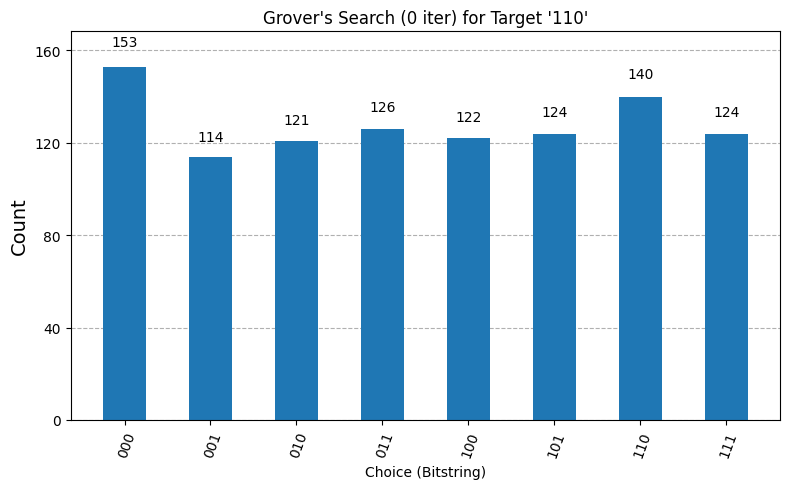

In [429]:
all_possible_labels = ls
all_possible_labels.sort() # Ensure consistent order

full_counts_for_plot = {label: counts.get(label, 0) for label in all_possible_labels}

fig, ax = plt.subplots(figsize=(8,5)) # Create a figure and an axes
plot_histogram(
    full_counts_for_plot, # Plot the dictionary that contains all labels
    ax=ax,
    title=f"Grover's Search ({num_iterations} iter) for Target '{target_bitstring_str}'",
    sort='asc',
    bar_labels=True
)
ax.set_xlabel("Choice (Bitstring)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [430]:
iteration_number = 1
print(f"--- Generating plot for {iteration_number} iteration(s) ---")

grover_qc = grover_circuit_qiskit(nqubits, reversed_marked_bitstring, reps=iteration_number)

compiled_qc = transpile(grover_qc, simulator)
job = simulator.run(compiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(grover_qc)

print(counts)
if target_bitstring_str in counts1:
   print(f"Probability of finding '{target_bitstring_str}': {counts[target_bitstring_str]/1024:.3f}")
else:
   print(f"Probability of finding '{target_bitstring_str}': 0.000")

--- Generating plot for 1 iteration(s) ---
{'001': 36, '101': 31, '010': 33, '000': 29, '111': 28, '011': 23, '100': 40, '110': 804}
Probability of finding '110': 0.785


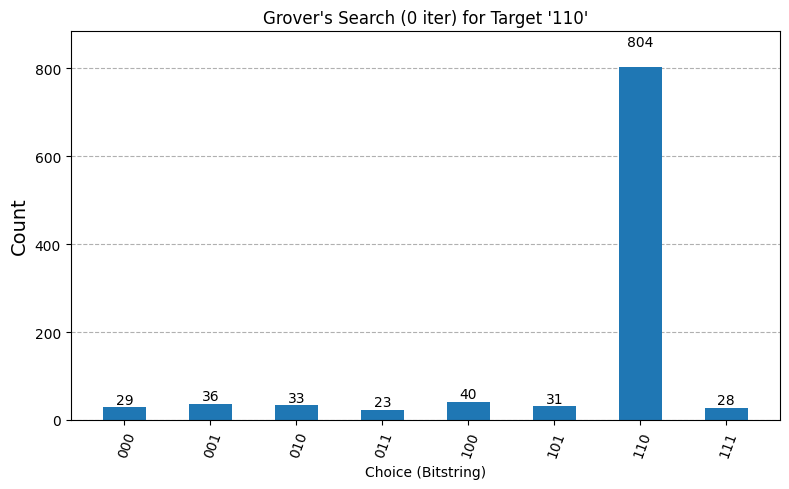

In [431]:
all_possible_labels = ls
all_possible_labels.sort() # Ensure consistent order

full_counts_for_plot = {label: counts.get(label, 0) for label in all_possible_labels}

fig, ax = plt.subplots(figsize=(8,5)) # Create a figure and an axes
plot_histogram(
    full_counts_for_plot, # Plot the dictionary that contains all labels
    ax=ax,
    title=f"Grover's Search ({num_iterations} iter) for Target '{target_bitstring_str}'",
    sort='asc', # Sorts x-axis labels '00', '01', '10', '11'
    bar_labels=True
)
ax.set_xlabel("Choice (Bitstring)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [432]:
iteration_number = 2
print(f"--- Generating plot for {iteration_number} iteration(s) ---")

grover_qc = grover_circuit_qiskit(nqubits, reversed_marked_bitstring, reps=iteration_number)

compiled_qc = transpile(grover_qc, simulator)
job = simulator.run(compiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(grover_qc)

print(counts)
if target_bitstring_str in counts:
   print(f"Probability of finding '{target_bitstring_str}': {counts[target_bitstring_str]/1024:.3f}")
else:
   print(f"Probability of finding '{target_bitstring_str}': 0.000")

--- Generating plot for 2 iteration(s) ---
{'010': 8, '000': 4, '101': 2, '001': 6, '111': 7, '011': 11, '100': 9, '110': 977}
Probability of finding '110': 0.954


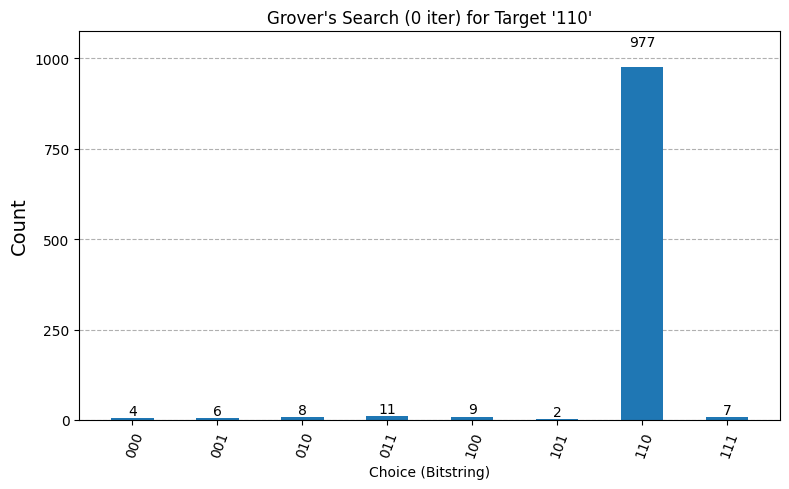

In [433]:
all_possible_labels = ls
all_possible_labels.sort() # Ensure consistent order

full_counts_for_plot = {label: counts.get(label, 0) for label in all_possible_labels}

fig, ax = plt.subplots(figsize=(8,5)) # Create a figure and an axes
plot_histogram(
    full_counts_for_plot, # Plot the dictionary that contains all labels
    ax=ax,
    title=f"Grover's Search ({num_iterations} iter) for Target '{target_bitstring_str}'",
    sort='asc', # Sorts x-axis labels '00', '01', '10', '11'
    bar_labels=True
)
ax.set_xlabel("Choice (Bitstring)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [434]:
iteration_number = 3
print(f"--- Generating plot for {iteration_number} iteration(s) ---")

grover_qc = grover_circuit_qiskit(nqubits, reversed_marked_bitstring, reps=iteration_number)

compiled_qc = transpile(grover_qc, simulator)
job = simulator.run(compiled_qc, shots=1024)
result = job.result()
counts = result.get_counts(grover_qc)

print(counts)
if target_bitstring_str in counts:
   print(f"Probability of finding '{target_bitstring_str}': {counts[target_bitstring_str]/1024:.3f}")
else:
   print(f"Probability of finding '{target_bitstring_str}': 0.000")

--- Generating plot for 3 iteration(s) ---
{'100': 95, '001': 101, '011': 108, '111': 94, '101': 112, '110': 299, '010': 106, '000': 109}
Probability of finding '110': 0.292


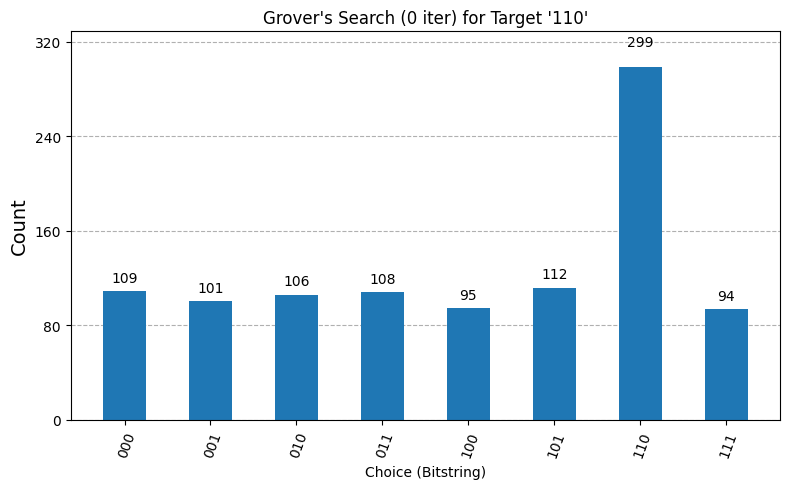

In [435]:
all_possible_labels = ls
all_possible_labels.sort() # Ensure consistent order

full_counts_for_plot = {label: counts.get(label, 0) for label in all_possible_labels}

fig, ax = plt.subplots(figsize=(8,5)) # Create a figure and an axes
plot_histogram(
    full_counts_for_plot, # Plot the dictionary that contains all labels
    ax=ax,
    title=f"Grover's Search ({num_iterations} iter) for Target '{target_bitstring_str}'",
    sort='asc',
    bar_labels=True
)
ax.set_xlabel("Choice (Bitstring)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

## **Local Testing Script Explanation (Grovers Algorithm.py)**

Alongside this educational notebook, we provided a Python script named Grovers Algorithm.py. This script serves as a local testing tool to help you verify the correctness of our Grover's algorithm implementation before you consider running jobs on real quantum hardware or more extensive simulations.

How the Grovers Algorithm.py Script Works:
The script is designed to be run directly from your command line. It contains the following key components:

1. Core Grover's Algorithm Functions:
 * `make_oracle_qiskit(qc, data_qubits, ancilla_qubit, marked_bitstring)`

 * `diffuser_qiskit(qc, data_qubits, ancilla_qubit)`

 * `grover_circuit_qiskit(n_data_qubits, marked_bitstring, reps=1)`

2. Helper Functions:
 * `generate_binary_strings(marked_item_decimal)`

 * `get_marked_bitstring(marked_item_decimal, nqubits)`: It returns two values:
A binary string representation of the decimal number, padded with leading zeros to match nqubits (e.g., decimal 2 for 3 qubits becomes "010"). This string is MSB-first and is used for checking against Qiskit's simulation results, and a list of integers representing this binary string (e.g., "010" becomes [0, 1, 0])

 * `get_reversed_marked_bitstring(marked_bitstring_list)`

3. `run_grover_test(...)` Function:

*This is the main testing function. It takes the number of data qubits, the decimal value of the item to search for, the number of Grover iterations, the number of simulation shots, and a success threshold as input.

* It first checks if the marked_item_decimal is within the valid range for the given number of qubits.

* It calls get_marked_bitstring to get the MSB-first string (for result checking) and the MSB-first list.

* It calls `get_reversed_marked_bitstring` to prepare the LSB-first list for the oracle.

* It constructs the Grover circuit using `grover_circuit_qiskit`, passing the reversed (LSB-first) bitstring list to it, which `grover_circuit_qiskit` then passes to `make_oracle_qiskit` and `diffuser_qiskit`.

* It simulates the circuit using AerSimulator for the specified number of shots.
It retrieves the measurement counts. The keys in this counts dictionary are MSB-first binary strings.

* It then checks if the original MSB-first `marked_bitstring_str` is present in the counts and if its probability (count/shots) meets or exceeds the success_threshold.

* It prints whether the test "PASSED" or "FAILED" along with the probability of finding the target.

4. Main Execution Block (if __name__ == "__main__":):

This block executes when the script is run. It contains several pre-defined test cases that call `run_grover_test` with different parameters (number of qubits, marked item, and number of iterations).
These test cases cover scenarios for 2, 3, and 4 data qubits, using the theoretically (near) optimal number of iterations for finding a single marked item.
Finally, it prints a summary of which test cases passed or failed.



### **What does the script check?**

The primary goal of the script is to check the correctness of the Grover's algorithm implementation. Specifically, it verifies:

1. Oracle Functionality: Indirectly, by checking if the correct state is amplified, it tests whether the oracle is correctly "marking" the intended item by phase inversion. The crucial part here is the correct handling of bit ordering (MSB-first vs. LSB-first) between the user's input (decimal marked item) and the oracle's operation.

2. Diffuser Functionality: It tests if the diffuser is correctly amplifying the amplitude of the marked state.

3. Overall Algorithm Performance: It checks if, after the specified number of Grover iterations, the probability of measuring the `marked_item_decimal` (converted to its MSB-first binary string) is significantly high (above the success_threshold).

4. Parameter Robustness (Basic): By running a few different test cases (2, 3, and 4 qubits with corresponding optimal iterations), it gives a basic check that the algorithm scales correctly for small numbers of qubits.

### **How can the reader use it to verify correctness before running on real hardware?**

1. Save the Script: Ensure the code is saved as a Python file (e.g., Grovers Algorithm.py).

2. Install Qiskit: Make sure Qiskit (including qiskit-aer for the simulator) is installed in your Python environment (pip install qiskit qiskit-aer).

3. Run from Terminal: Open a terminal or command prompt, navigate to the directory where you saved the file, and run the script using:

python "Grovers Algorithm.py"

4. Observe Output: The script will print the progress of each test case, including the simulation counts and the probability of finding the target item. A "Test PASSED" message indicates that for that specific configuration, the algorithm successfully identified the marked item with a probability exceeding the defined threshold (default 75%).

5. Modify and Experiment (Advanced Users): Readers can modify the `if __name__ == "__main__":` block in the .py script to:

* Test different numbers of qubits (n_data_qubits).

* Search for different `marked_item_decimal` values.

* Experiment with the num_iterations to see how it affects the success probability (demonstrating the concept of optimal iterations and over-iteration).

* Adjust the success_threshold.


## **Example Running on Real Quantum Hardware**

Now that we've understood Grover's algorithm, built its components, and tested it on a local simulator, let's take the exciting step of running it on actual IBM Quantum hardware!

Running algorithms on real quantum computers introduces new considerations like qubit connectivity, gate errors, and measurement noise. For educational purposes, we'll use a small instance of Grover's algorithm.

**Choosing a Backend:**

For this demonstration, we need a backend that:

* Has at least 4 qubits (3 data qubits for our N=8 search, plus 1 ancilla qubit).

* Has reasonable qubit connectivity to implement the necessary multi-controlled-X (MCX) gates.

* Is currently online and has a manageable queue (though queue times can vary).

A good candidate is often one of IBM's smaller, publicly accessible systems or even the **ibmq_qasm_simulator** if you want to simulate with a noise model from a real device without waiting in long queues for actual hardware. For a real hardware run, we might choose a backend like **ibm_brisbane** (if available and suitable) or another 5-7 qubit system.

**Appropriate Backend?**

* Number of Qubits: Our Grover's algorithm for N=8 items requires 3 data qubits and 1 ancilla qubit, totaling 4 qubits. The chosen backend must support this.

* Connectivity: The MCX gates (especially the 3-control MCX in the oracle and diffuser for 3 data qubits) can be decomposed into simpler CNOT and single-qubit gates. The efficiency of this decomposition depends on the backend's qubit connectivity (coupling map). A backend with good connectivity will result in a shallower, less noisy transpiled circuit.

* Error Rates & Calibration: We generally prefer backends with lower gate error rates and better coherence times, which are regularly calibrated.

<br>

**Read the IBM documentation to get run circuit on a quantum hardware of you selection.**

https://docs.quantum.ibm.com/guides

**Setup**

In [34]:
!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.0.1
    Uninstalling qiskit-2.0.1:
      Successfully uninstalled qiskit-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.39.0 requires qiskit>=1.4.1, but you have qiskit 1.0.2 which is incompatible.
qiskit-aer 0.17.0 requires qiskit>=1.1.0, but you have qiskit 1.0.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


  Using cached qiskit-2.0.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-2.0.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.0.2
    Uninstalling qiskit-1.0.2:
      Successfully uninstalled qiskit-1.0.2


In [2]:
### Save API Token, if needed

%set_env QXToken=6a1d024ea3dd044d2b27c831cfc8f809162c426528460da77e4ca95e04daa29e69f0f4203aabbb3825c8541f1ea9a77dc42271cd7f470c4ca4368dd319b60218

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=6a1d024ea3dd044d2b27c831cfc8f809162c426528460da77e4ca95e04daa29e69f0f4203aabbb3825c8541f1ea9a77dc42271cd7f470c4ca4368dd319b60218


In [34]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_aer import AerSimulator

#### **Sampler**

The [Qiskit Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler) primitive ([more info on Primitives here](https://docs.quantum.ibm.com/run/primitives-get-started)) returns the sampled result according to the specified output type. It allows us to efficiently sample quantum states by executing quantum circuits and providing probability distributions of the quantum states.


In [37]:
num_iterations = 2 # Optimal for N=8,

qc = grover_circuit_qiskit(nqubits, reversed_marked_bitstring, reps=num_iterations)

qc.measure_all()

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000) # you can adjust the number of shots.

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'1110': 4660, '0110': 4803, '0111': 31, '1001': 41, '0010': 39, '0100': 33, '1111': 40, '1000': 34, '1100': 41, '0001': 41, '0000': 33, '1010': 40, '0101': 30, '1101': 40, '0011': 50, '1011': 44}


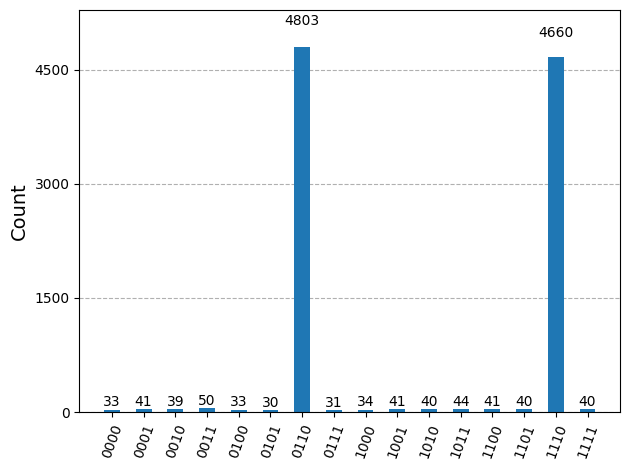

In [38]:
plot_histogram(counts_sampler) # Note that the ancilla is the leftmost qubit according to the MSB

We get the probability of data qubits to be arranged as "110" significantly higher that other probabilities. (with ancilla being 0 or 1 in the bitstrings)

#### **Transpile**
In this part we will use the [FakeSherbrooke](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeSherbrooke), a fake  (simulated) 127-qubit backend, useful for testing the transpiler and other backend-facing functionalities.

Preset pass managers are the default pass managers used by the `transpile()` function. `transpile()` provides a convenient and simple method to construct a standalone `PassManager` object that mirrors what the transpile function does when optimizing and transforming a quantum circuit for execution on a specific backend.

Define the pass manager. Reference the [Qiskit documentation](https://docs.quantum.ibm.com/api/qiskit/0.42/qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager) for more info.

In [44]:
from qiskit import QuantumCircuit, transpile

import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

In [50]:
backend_answer = FakeSherbrooke()

# Step 2: Set the optimization level (e.g., 3 for maximum optimization)
optimization_level_answer = 3

transpiled_circuit = transpile(circuit, backend=backend_answer, optimization_level=3)

job = backend_answer.run(transpiled_circuit, shots=1024)

# Get the results of the execution
try:
    result = job.result()
    counts = result.get_counts(transpiled_circuit)  # Get counts for the transpiled circuit
    print("\nResults (Transpiled Circuit):", counts)

    # Optionally, print the original circuit and the transpiled circuit
    print("\nOriginal Circuit:")
    print(circuit)
    print("\nTranspiled Circuit:")
    print(transpiled_circuit)

except Exception as e:
    print(f"Error running the circuit: {e}")
    print("Job Status:", job.status()) # Print the job status for debugging.
    # If the job failed, you might want to check the error message:
    if hasattr(job, 'error_message'):
        print("Error Message:", job.error_message())

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)



Results (Transpiled Circuit): {'101': 47, '001': 39, '111': 102, '011': 48, '000': 58, '010': 72, '100': 79, '110': 579}

Original Circuit:
         ┌───┐      ░ ┌───┐     ┌───┐ ░ ┌───┐┌───┐     ┌───┐┌───┐ ░ ┌───┐     »
    q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░─┤ X ├──■──»
         ├───┤      ░ └───┘  │  └───┘ ░ ├───┤├───┤  │  ├───┤├───┤ ░ └───┘  │  »
    q_1: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░────────■──»
         ├───┤      ░        │        ░ ├───┤├───┤  │  ├───┤├───┤ ░        │  »
    q_2: ┤ H ├──────░────────■────────░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░────────■──»
         ├───┤┌───┐ ░      ┌─┴─┐      ░ └───┘└───┘┌─┴─┐└───┘└───┘ ░      ┌─┴─┐»
ancilla: ┤ X ├┤ H ├─░──────┤ X ├──────░───────────┤ X ├───────────░──────┤ X ├»
         └───┘└───┘ ░      └───┘      ░           └───┘           ░      └───┘»
    c: 3/═════════════════════════════════════════════════════════════════════»
                                                           

Results (Transpiled Circuit): {'101': 47, '001': 39, '111': 102, '011': 48, '000': 58, '010': 72, '100': 79, '110': 579}

As we see, the marked_bitstring "110" has the higher probability from the shots.

In [51]:
result = job.result()
counts = result.get_counts(transpiled_circuit)
print(counts)

{'101': 47, '001': 39, '111': 102, '011': 48, '000': 58, '010': 72, '100': 79, '110': 579}


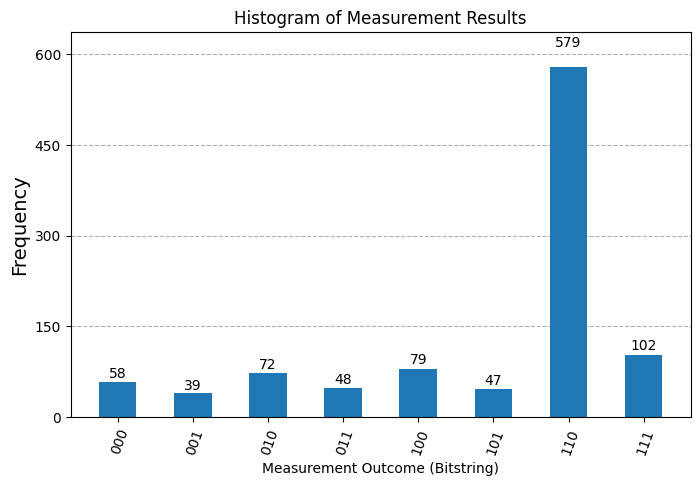

In [62]:
%matplotlib inline
# Import the necessary plotting function
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# Access the counts directly from the result object
counts = result.get_counts(transpiled_circuit)
fig, ax = plt.subplots(figsize=(8, 5))
plot_title = "Histogram of Measurement Results"
# Generate the histogram plot
# Pass the counts dictionary and the axes object to plot_histogram
plot_histogram(
    counts,
    ax=ax,             # Specify the axes to draw on
    title=plot_title,  # Set the title of the plot
    sort='asc',        # Sort the bars by count in ascending order (as in your example)
    bar_labels=True    # Show the count on top of each bar (as in your example)
)
ax.set_xlabel("Measurement Outcome (Bitstring)")
ax.set_ylabel("Frequency")


# Plot the histogram using the retrieved counts
plot_histogram(counts)
plt.show()

## **Estimate of Hardware Runtime**
To provide an estimate for running our Grover's algorithm (3 data qubits, 1 ancilla, 2 iterations) on a real quantum device, we can analyze the circuit characteristics after transpilation for a specific backend. For this estimation, we will consider the properties of a backend similar to IBM Sherbrooke (127 qubits), by using Qiskit's FakeSherbrooke() a local simulator that mimics its properties, including its coupling map and basis gates. While FakeSherbrooke is a simulator, transpiling for it gives us a good idea of the circuit complexity on the real hardware.

The actual runtime on a device like Sherbrooke will depend on the number of Circuit Runner Program (CRP) executions, which is related to the number of shots and any dynamic circuit features (not heavily used in this basic Grover example).

The parameters for our specific Grover's algorithm instance:
* Number of data qubits: 3 (for $2^3=8$ items)
* Number of ancilla qubits: 1
* Total logical qubits: 4
* Marked item: "110" (decimal 6)
* Number of Grover iterations: 2 (near-optimal for N=8, M=1)



In [64]:
depth = transpiled_circuit.depth()
ops_count = transpiled_circuit.count_ops()

print(f"\n--- Estimated Circuit Characteristics for FakeSherbrooke ---")
print(f"Number of logical qubits used in algorithm: {qc.num_qubits}") # Should be 4
print(f"Number of physical qubits used by transpiled circuit (may vary): {transpiled_circuit.num_qubits}")
print(f"Depth of transpiled circuit: {depth}")
print(f"Operations in transpiled circuit: {ops_count}")


--- Estimated Circuit Characteristics for FakeSherbrooke ---
Number of logical qubits used in algorithm: 4
Number of physical qubits used by transpiled circuit (may vary): 127
Depth of transpiled circuit: 329
Operations in transpiled circuit: OrderedDict([('rz', 257), ('sx', 149), ('ecr', 75), ('x', 31), ('barrier', 5), ('measure', 3)])


### **1. Circuit Characteristics (Estimated using FakeSherbrooke)**

After transpiling this circuit for FakeSherbrooke with optimization_level=3, we obtained the following characteristics:

* Number of logical qubits used: 4

* Number of physical qubits used by transpiled circuit: 127 (The transpiler used the context of the full device; a specific execution might map to a smaller subset of these physical qubits.)

* Depth of transpiled circuit: 329

Operations in transpiled circuit:
  * rz: 257
  * sx: 149
  * ecr (two-qubit gates): 75
  * x: 31
  * measure: 3 (for the 3 data qubits)

  The circuit depth of 329 and 75 ECR (two-qubit) gates indicate that the decomposition of the multi-controlled X gates (inherent in Grover's oracle and diffuser for 3 data qubits) into the device's native basis gates is quite extensive. This depth makes the circuit susceptible to noise on current quantum hardware.

### **2. Runtime Estimation Parameters:**

* Number of logical qubits: 4
* Circuit depth (estimated for Sherbrooke-like device): 329
* Number of ECR (two-qubit) gates: 75
* Number of shots: We'll assume *4096 shots* for this estimation, a common value for obtaining reasonable statistics.

### **3. Estimated Device Runtime (excluding queue time):**

* Estimated device runtime = 4096 shots * (100 $μs$/shot to 200 $μs$/shot)

* Estimated device runtime = 4096 * (0.0001 s to 0.0002 s)

* Estimated device runtime = 0.41 seconds to 0.82 seconds

#End of notebook
---
Author: Arife Nur Ayaz